## Final Project (Student Performance Dataset)

The aim of this project is to assess student's performance by measuring their background such as family and their social life. Understanding student is very important for teaching hence this will be beneficial for teacher's method of teaching to enable student learning.

Columns Details and Reference

#Famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
#Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
#Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary, 4 - higher education
#Fedu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary, 4 - higher education
#Mjob - mother's job ('teacher', 'health care', 'civil services' (e.g. administrative or police), 'at_home' (Housewife) or others
#Fjob - father's job ('teacher', 'health care', 'civil services' (e.g. administrative or police), 'at_home' (Housewife) or others
#guardian (student's guardian)
#traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - > 1 hour)
#studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - > 10 hours)
#failures - number of past class failures (numeric: n if 1<=n<3, else 4)
#schoolsup - extra educational support (binary: yes or no)
#famsup - family educational support (binary: yes or no)
#paid - extra paid classes within the course subject (binary: yes or no)
#activities - extra-curricular activities (binary: yes or no)
#nursery - attended nursery school (binary: yes or no)
#higher - wants to take higher education (binary: yes or no)
#internet - Internet access at home (binary: yes or no)
#romantic - with a romantic relationship (binary: yes or no)
#famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
#freetime - free time after school (numeric: from 1 - very low to 5 - very high)
#goout - going out with friends (numeric: from 1 - very low to 5 - very high)
#dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
#walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
#health - current health status (numeric: from 1 - very bad to 5 - very good)
#absences - number of school absences (numeric: from 0 to 93)
#G1 - first period grade (numeric: from 0 to 20)
#G2 - second period grade (numeric: from 0 to 20)
#G3 - final grade (numeric: from 0 to 20, output target)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
student_data = pd.read_csv("Student Performance.csv")

In [3]:
student_data.head() #read data to ensure a proper setup

,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,guardian,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,F,18,U,GT3,A,4,4,at_home,teacher,mother,...,4,3,4,1,1,3,4,0,11,11
1,F,17,U,GT3,T,1,1,at_home,other,father,...,5,3,3,1,1,3,2,9,11,11
2,F,15,U,LE3,T,1,1,at_home,other,mother,...,4,3,2,2,3,3,6,12,13,12
3,F,15,U,GT3,T,4,2,health,services,mother,...,3,2,2,1,1,5,0,14,14,14
4,F,16,U,GT3,T,3,3,other,other,father,...,4,3,2,1,2,5,0,11,13,13


In [4]:
student_data.isnull().sum().to_frame('No. of Nulls') #checking for missing values

,No. of Nulls
sex,0
age,0
address,0
famsize,0
Pstatus,0
Medu,0
Fedu,0
Mjob,0
Fjob,0
guardian,0


In [5]:
#Create a total_score column with the scores added up in Grade period 1, 2 and final grade
#Consider that the full marks is 60. 

student_data["total_score"] = student_data['G1'] + student_data["G2"] + student_data["G3"]

In [6]:
#ranging the total scores in 3 levels - Low, Average, High Grades
#students who scored lower than 25 is low
#students who scored between 25 to 45 is average
#students who scored higher than 45 is high

def marks(total_score):
    if(total_score<25):
        return("low")
    elif(total_score>=25 and total_score<45):
        return("average")
    elif(total_score>=45):
        return("high")
student_data["grades"]=student_data["total_score"].apply(marks)

In [7]:
counts = student_data["grades"].value_counts()
print(counts)

average    505
high        86
low         58
Name: grades, dtype: int64


Text(0, 0.5, 'Number of Student')

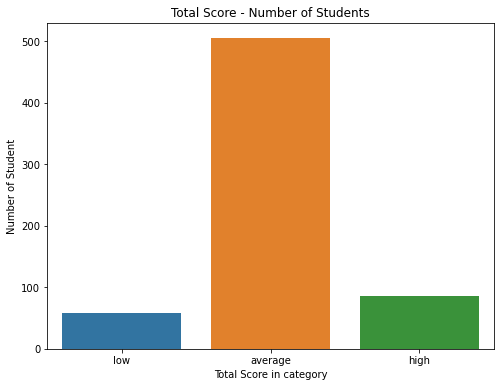

In [8]:
#Visualize grades
plt.figure(figsize=(8, 6))
sns.countplot(student_data["grades"], order=["low","average","high"])
plt.title('Total Score - Number of Students')
plt.xlabel('Total Score in category')
plt.ylabel('Number of Student')

In [9]:
# In order to do a better correlation later, we will do the same converting all social variables to low, average and high

In [10]:
def absence(absences):
    if(absences<5):
        return(1)
    elif(absences>=5 and absences<10):
        return(2)
    elif(absences>=10):
        return(3)
student_data["absent"]=student_data["absences"].apply(absence)

def family_relation(famrel):
    if(famrel<2):
        return(1)
    elif(famrel>=2 and famrel<3):
        return(2)
    elif(famrel>=3):
        return(3)
student_data["family"]=student_data["famrel"].apply(family_relation)

def going_out(goout):
    if(goout<2):
        return(1)
    elif(goout>=2 and goout<3):
        return(2)
    elif(goout>=3):
        return(3)
student_data["go_out"]=student_data["goout"].apply(going_out)

def alcohol_day_comsumption(Dalc):
    if(Dalc<2):
        return(1)
    elif(Dalc>=2 and Dalc<3):
        return(2)
    elif(Dalc>=3):
        return(3)
student_data["alcohol_weekday"]=student_data["Dalc"].apply(alcohol_day_comsumption)

def alcohol_weekend_comsumption(Walc):
    if(Walc<2):
        return(1)
    elif(Walc>=2 and Walc<3):
        return(2)
    elif(Walc>=3):
        return(3)
student_data["alcohol_weekend"]=student_data["Walc"].apply(alcohol_weekend_comsumption)

def alcohol_weekend_comsumption(Walc):
    if(Walc<2):
        return(1)
    elif(Walc>=2 and Walc<3):
        return(2)
    elif(Walc>=3):
        return(3)
student_data["alcohol_weekend"]=student_data["Walc"].apply(alcohol_weekend_comsumption)

def travel_time(traveltime):
    if(traveltime<2):
        return(1)
    elif(traveltime>=2 and traveltime<3):
        return(2)
    elif(traveltime>3):
        return(3)
student_data["travel"]=student_data["traveltime"].apply(travel_time)

def marks2(total_score):
    if(total_score<25):
        return(1)
    elif(total_score>=25 and total_score<45):
        return(2)
    elif(total_score>=45):
        return(3)
student_data["totalgrades"]=student_data["total_score"].apply(marks2)

In [11]:
student_data.head(20)

,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,guardian,...,G3,total_score,grades,absent,family,go_out,alcohol_weekday,alcohol_weekend,travel,totalgrades
0,F,18,U,GT3,A,4,4,at_home,teacher,mother,...,11,22,low,1,3,3,1,1,2.0,1
1,F,17,U,GT3,T,1,1,at_home,other,father,...,11,31,average,1,3,3,1,1,1.0,2
2,F,15,U,LE3,T,1,1,at_home,other,mother,...,12,37,average,2,3,2,2,3,1.0,2
3,F,15,U,GT3,T,4,2,health,services,mother,...,14,42,average,1,3,2,1,1,1.0,2
4,F,16,U,GT3,T,3,3,other,other,father,...,13,37,average,1,3,2,1,2,1.0,2
5,M,16,U,LE3,T,4,3,services,other,mother,...,13,37,average,2,3,2,1,2,1.0,2
6,M,16,U,LE3,T,2,2,other,other,mother,...,13,38,average,1,3,3,1,1,1.0,2
7,F,17,U,GT3,A,4,4,other,teacher,mother,...,13,36,average,1,3,3,1,1,2.0,2
8,M,15,U,LE3,A,3,2,services,other,mother,...,17,48,high,1,3,2,1,1,1.0,3
9,M,15,U,GT3,T,3,4,other,other,mother,...,13,37,average,1,3,1,1,1,1.0,2


## Identify the top/bottom 20 students based on their grades


In [12]:
top_20 = student_data.sort_values(by = ["total_score"],ascending=False).head(15)
top_20

,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,guardian,...,G3,total_score,grades,absent,family,go_out,alcohol_weekday,alcohol_weekend,travel,totalgrades
338,F,17,R,LE3,T,3,1,services,other,mother,...,19,56,high,1,3,2,1,1,2.0,3
617,F,18,U,LE3,T,1,1,at_home,services,father,...,18,54,high,1,3,2,1,1,2.0,3
349,F,17,U,GT3,T,3,2,health,health,father,...,18,54,high,1,3,2,1,2,1.0,3
594,F,18,U,GT3,T,4,4,teacher,teacher,mother,...,18,54,high,1,3,3,1,2,2.0,3
636,M,18,U,GT3,T,4,4,teacher,teacher,father,...,19,54,high,1,3,3,1,3,1.0,3
606,F,17,U,GT3,T,4,2,teacher,other,father,...,18,54,high,1,3,3,3,1,2.0,3
332,F,18,U,GT3,T,2,2,at_home,at_home,mother,...,18,54,high,1,3,3,1,2,1.0,3
596,F,17,U,GT3,T,4,2,other,other,mother,...,18,53,high,1,3,3,1,2,2.0,3
337,F,17,U,GT3,T,4,3,health,services,mother,...,18,53,high,1,3,2,1,2,1.0,3
549,F,17,R,GT3,T,4,2,other,other,mother,...,18,53,high,1,3,3,2,3,2.0,3


In [13]:
btm_20 = student_data.sort_values(by = ["total_score"],ascending=False).tail(20)
btm_20

,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,guardian,...,G3,total_score,grades,absent,family,go_out,alcohol_weekday,alcohol_weekend,travel,totalgrades
500,M,17,U,GT3,T,1,2,other,other,father,...,7,20,low,3,3,3,3,3,1.0,1
279,M,22,U,GT3,T,3,1,services,services,mother,...,5,20,low,3,3,3,3,3,1.0,1
514,F,16,U,GT3,T,3,2,services,at_home,mother,...,7,20,low,1,3,3,1,3,1.0,1
432,F,17,R,GT3,T,1,1,other,other,father,...,7,19,low,1,3,3,2,2,1.0,1
523,M,18,U,LE3,T,4,4,at_home,health,mother,...,6,17,low,1,3,3,3,3,1.0,1
572,F,16,U,GT3,A,3,2,services,at_home,mother,...,7,17,low,2,2,3,1,1,2.0,1
586,F,17,U,GT3,T,4,2,teacher,services,mother,...,0,16,low,1,3,3,1,3,1.0,1
519,M,16,R,GT3,T,2,1,other,services,mother,...,0,15,low,1,3,1,1,1,2.0,1
637,M,18,R,GT3,T,2,1,other,other,mother,...,0,14,low,1,3,3,1,3,2.0,1
583,F,18,R,GT3,T,2,2,other,other,mother,...,0,14,low,1,3,3,1,1,2.0,1


## Show the top/bottom 10 student's living in rural/urban

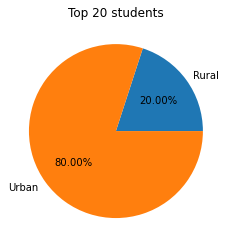

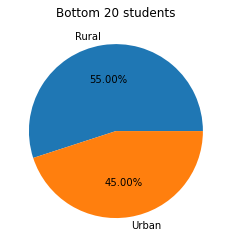

In [14]:
plt.figure(0) # Top 10 students

Rural=top_20.loc[student_data['address']=='R'].count()[0]
Urban=top_20.loc[student_data['address']=='U'].count()[0]
labels=['Rural','Urban']
plt.pie([Rural,Urban],labels=labels,autopct='%.2f%%')
plt.title('Top 20 students')

plt.figure(1) #Btm 10 Students

Rural=btm_20.loc[student_data['address']=='R'].count()[0]
Urban=btm_20.loc[student_data['address']=='U'].count()[0]
labels=['Rural','Urban']
plt.pie([Rural,Urban],labels=labels,autopct='%.2f%%')
plt.title('Bottom 20 students')

plt.show()

## Show the top/bottom 20 student's parents education using mean

In [15]:
top_20.groupby('grades')[["Medu", "Fedu"]].agg([np.mean])

,Medu,Fedu
,mean,mean
grades,,
high,3.133333,2.466667


In [16]:
btm_20.groupby('grades')[["Medu", "Fedu"]].agg([np.mean])

,Medu,Fedu
,mean,mean
grades,,
low,2.4,1.8


## Show the top/bottom 20 student's living with/apart parents

In [17]:
top_20["tog_apart"] = student_data['Pstatus'].map( 
                   {'T':1 ,'A':0})

btm_20["tog_apart"] = student_data['Pstatus'].map( 
                   {'T':1 ,'A':0})

In [18]:
a = top_20["tog_apart"]

In [19]:
b = btm_20["tog_apart"]

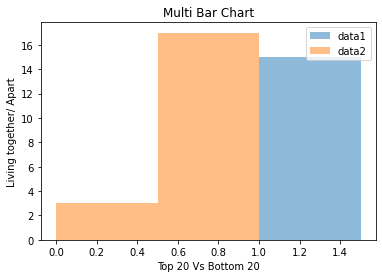

In [20]:
plt.figure(figsize=(6,4))
plt.hist(a, bins=2, alpha=0.5, label="data1")
plt.hist(b, bins=2, alpha=0.5, label="data2")

plt.xlabel("Top 20 Vs Bottom 20", size=10)
plt.ylabel("Living together/ Apart", size=10)
plt.title("Multi Bar Chart")
plt.legend(loc='upper right')



## Performance by gender

In [21]:
student_score_sex = student_data.groupby("sex")['total_score'].mean().reset_index()
student_score_sex

,sex,total_score
0,F,35.712794
1,M,33.669173


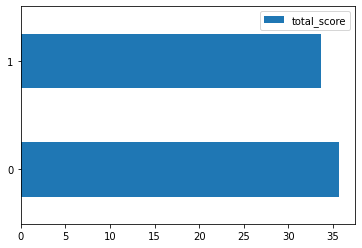

In [22]:
student_score_sex.plot(kind = "barh") 

## Does family support have impact towards achievements?

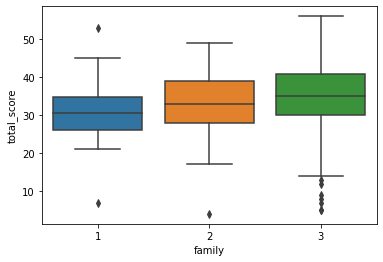

In [23]:
sns.boxplot(data=student_data, x="family", y="total_score")

## What type of job parent's hold will have impact towards student achievements?

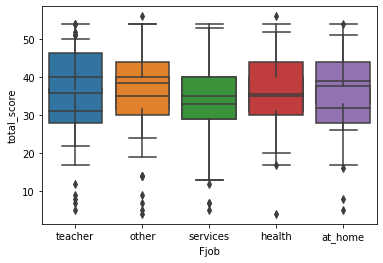

In [24]:
sns.boxplot(data=student_data, x="Mjob", y="total_score")
sns.boxplot(data=student_data, x="Fjob", y="total_score")

##  Which social factors has the most influence on academic achievement?

In [25]:
#Take romantic value (yes = 1, no = 0), convert in order to perform the below analysis
student_data['romantic_value'] = student_data['romantic'].map( 
                   {'yes':1 ,'no':0})


In [26]:
Social_factors = student_data.groupby('grades')[["goout", 'Dalc', 'Walc', 'romantic_value']].sum()

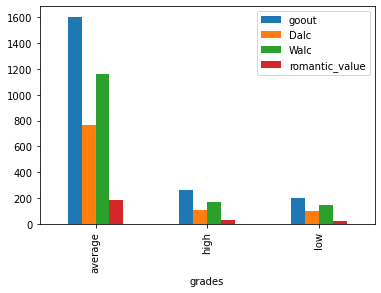

In [27]:
Social_factors.plot(kind = "bar") 

In [28]:
melt = pd.melt(student_data,id_vars='grades',value_vars=['goout','Dalc','Walc', 'romantic_value', 'absences', 'traveltime', "famrel"])

<function matplotlib.pyplot.show(*args, **kw)>

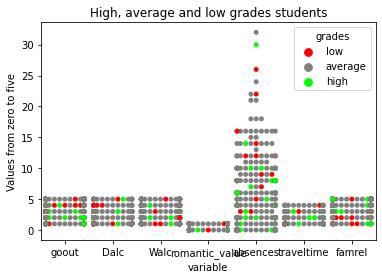

In [29]:
sns.swarmplot(x='variable',y='value',hue='grades' , data=melt,palette={'high':'lime','average':'grey','low':'red'})
plt.ylabel('Values from zero to five')
plt.title('High, average and low grades students')
plt.show

##  Social factors correlation with student performance

In [30]:
a = student_data[['absent','family','go_out', 'travel', "alcohol_weekend", "alcohol_weekday",'studytime','totalgrades']]

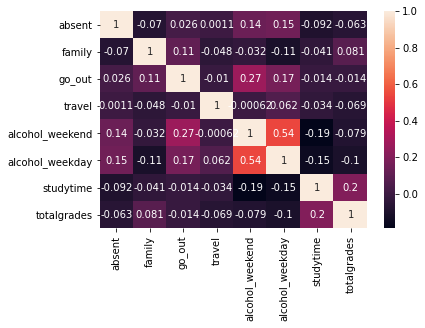

In [31]:
sns.heatmap(a.corr(), annot=True)
plt.show()  

## Factor Analysis - To identify which factor is the most important for academics to take note.

In [32]:
import sklearn.datasets
from factor_analyzer import FactorAnalyzer
#install conda install -c desilinguist factor_analyzer

In [33]:
fa = FactorAnalyzer(n_factors = 50, rotation="varimax")

In [65]:
#drop non-numerical variables to only compute data with numbers in order for factor_analysis to work

#student_data1 = student_data.drop(["sex", 'age', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'guardian', 'grades', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'G1', 'G2', 'G3', 'nursery','higher', 'internet', 'romantic', 'address', 'travel', "total_score", 'romantic_value', 'absent', 'absences'], axis=1)

student_data1 = student_data[["totalgrades", "studytime", "family", "Medu", "Fedu", "travel", "go_out", "romantic_value", "absent", "alcohol_weekday", 'alcohol_weekend']]



In [66]:
student_data1

,totalgrades,studytime,family,Medu,Fedu,travel,go_out,romantic_value,absent,alcohol_weekday,alcohol_weekend
0,1,2,3,4,4,2.0,3,0,1,1,1
1,2,2,3,1,1,1.0,3,0,1,1,1
2,2,2,3,1,1,1.0,2,0,2,2,3
3,2,3,3,4,2,1.0,2,1,1,1,1
4,2,2,3,3,3,1.0,2,0,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
644,2,3,3,2,3,1.0,2,0,1,1,2
645,3,2,3,3,1,1.0,3,0,1,1,1
646,2,2,1,1,1,2.0,1,0,2,1,1
647,2,1,2,3,1,2.0,3,0,2,3,3


In [67]:
fa.fit(student_data1)

FactorAnalyzer(n_factors=50, rotation='varimax', rotation_kwargs={})

In [68]:
loadings = fa.loadings_

In [69]:
ev, v= fa.get_eigenvalues()

In [70]:
#do a scree plot
xvals = range(1,student_data1.shape[1]+1)
#+1 because index is 0

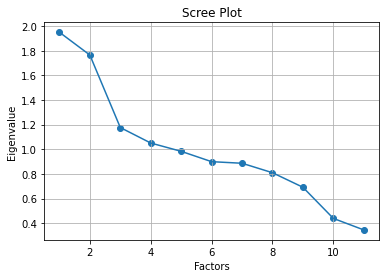

In [71]:
plt.scatter(xvals, ev)
plt.plot(xvals, ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [47]:
pd.DataFrame.from_records(loadings)

,0,1,2,3,4,5,6,7,8,9,10
0,-0.052771,0.163999,-0.026019,0.202126,0.104170,0.468904,-0.050046,0.039321,0.001751,-0.000206,0.0
1,-0.088900,0.040368,-0.002137,0.534888,-0.085880,0.180585,-0.125907,0.009453,0.000398,0.000669,0.0
2,-0.072278,-0.004737,0.101941,-0.059590,0.488362,0.074204,-0.100740,0.060670,-0.001959,0.000051,0.0
3,0.005556,0.790124,0.018540,0.006357,0.004450,0.098938,0.023659,0.119035,0.067977,-0.033171,0.0
4,0.015590,0.795355,0.005580,0.068830,-0.019287,0.097068,-0.071272,0.140560,-0.073181,0.035270,0.0
5,0.031309,-0.176852,-0.008120,-0.004557,-0.051685,-0.024381,-0.008001,-0.284252,-0.001127,0.000059,0.0
6,0.105878,0.020196,0.549082,0.032534,0.140003,-0.035946,0.025608,-0.006841,-0.019769,-0.000628,0.0
7,0.940290,0.011869,0.111771,-0.029604,-0.029670,-0.098121,0.179203,-0.072997,-0.010756,0.042327,0.0
8,0.103527,-0.017026,0.034772,-0.080560,-0.075458,-0.029585,0.321641,0.006973,0.001729,-0.000148,0.0
9,0.959278,0.001205,0.149180,-0.111379,-0.099595,-0.022521,0.091955,-0.029347,-0.005166,-0.042538,0.0
